In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:\\Users\\acer\\Downloads\\Mall_Customers.csv')

In [3]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
X = data.iloc[:,[2,3]].values
type(X)

numpy.ndarray

In [5]:
y = data.iloc[:,[2,3]]
type(y)

pandas.core.frame.DataFrame

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

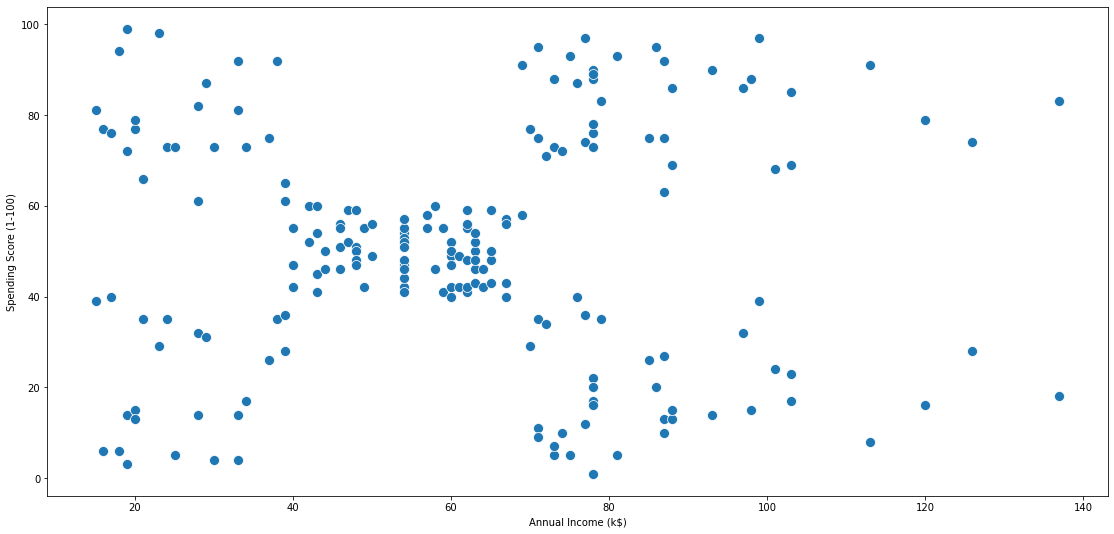

In [7]:
plt.figure(figsize=(19,9))
sns.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'],data=data,s=100)

plt.show()

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [10]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

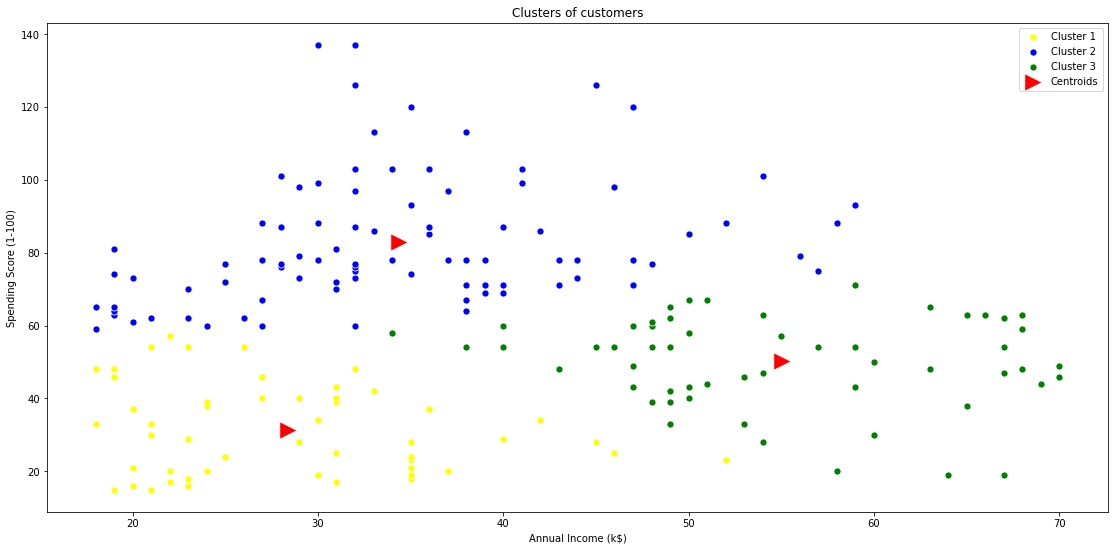

In [11]:
plt.figure(figsize=(19,9))

sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker='>')


plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [12]:
wcss = list()

for x in range(1,11):
    k = KMeans(n_clusters= x)
    k = k.fit(X)
    wcss.append(k.inertia_)

In [13]:
wcss

[176108.77999999997,
 87159.3043653594,
 59492.73799493272,
 39529.88796736351,
 31659.353138717815,
 25754.21670506912,
 21839.635516285518,
 18881.13519034741,
 15973.216533032186,
 13813.779261774913]

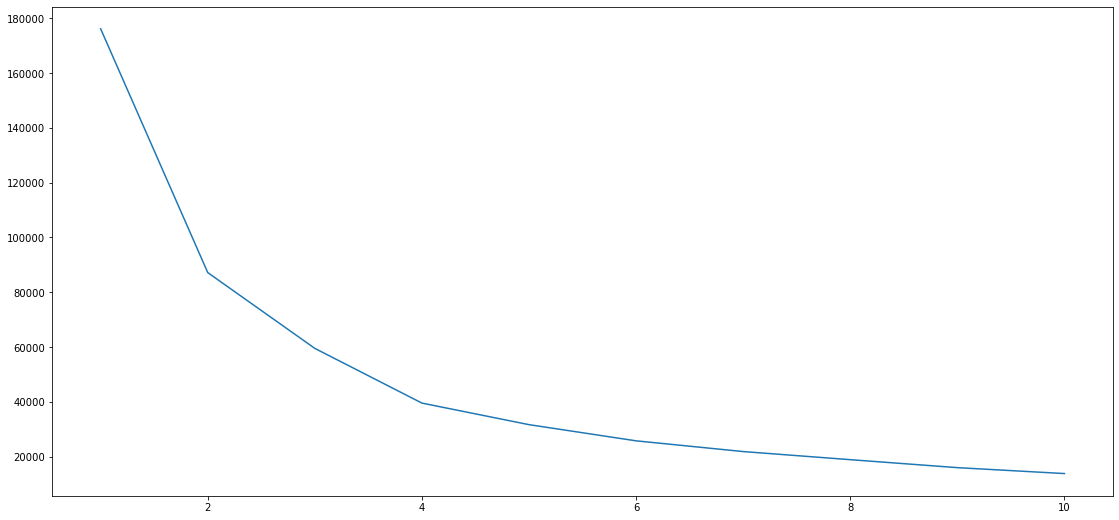

In [14]:
plt.figure(figsize=(19,9))

sns.lineplot(range(1,11),wcss)

plt.show()

In [15]:
kmeans = KMeans(n_clusters=5)

y_kmeans = kmeans.fit_predict(X)

y_kmeans

array([4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

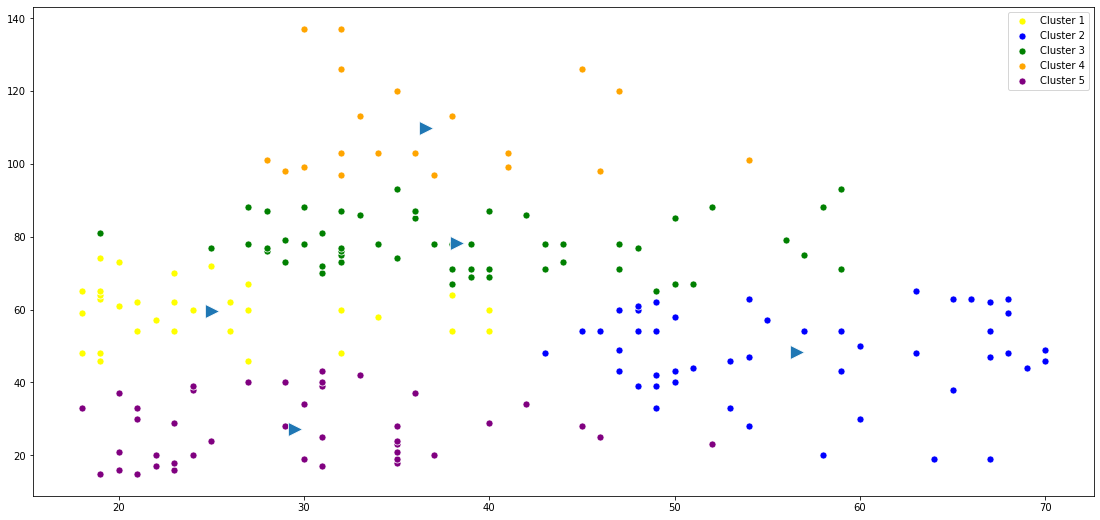

In [16]:
plt.figure(figsize=(19,9))

sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'orange', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'purple', label = 'Cluster 5',s=50)

sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='>',s=200)

plt.legend()
plt.show()

In [17]:
kmeans.cluster_centers_[:]

array([[ 25.06451613,  59.48387097],
       [ 56.62      ,  48.48      ],
       [ 38.25862069,  78.15517241],
       [ 36.6       , 109.7       ],
       [ 29.53658537,  27.24390244]])

In [18]:
kmeans.cluster_centers_[:,0]

array([25.06451613, 56.62      , 38.25862069, 36.6       , 29.53658537])

In [19]:
kmeans.cluster_centers_.shape

(5, 2)

In [20]:
kmeans.cluster_centers_[[1],:]

array([[56.62, 48.48]])